In [28]:
import numpy as np
import pandas as pd


dur = 1  # duration in seconds
amp = 0.3  # maximum amplitude
freq = 150  # frequency of the sine tone in Hertz
fs = 200  # sampling frequency in Hertz

t = np.arange(np.ceil(dur * fs)) / fs
y = amp * np.sin(2 * np.pi * freq * t)

data = {
        "sec": t/1000,
        "a_n": y,
        "a_e": y,
        "a_u": y
    }

df = pd.DataFrame(data)
print(df)

          sec           a_n           a_e           a_u
0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00
1    0.000005 -3.000000e-01 -3.000000e-01 -3.000000e-01
2    0.000010  1.102182e-16  1.102182e-16  1.102182e-16
3    0.000015  3.000000e-01  3.000000e-01  3.000000e-01
4    0.000020 -2.204364e-16 -2.204364e-16 -2.204364e-16
..        ...           ...           ...           ...
195  0.000975  3.000000e-01  3.000000e-01  3.000000e-01
196  0.000980 -2.998604e-14 -2.998604e-14 -2.998604e-14
197  0.000985 -3.000000e-01 -3.000000e-01 -3.000000e-01
198  0.000990  5.582532e-15  5.582532e-15  5.582532e-15
199  0.000995  3.000000e-01  3.000000e-01  3.000000e-01

[200 rows x 4 columns]


In [29]:
from Modules.integrate import integrate_wrap, world_cord, board_cord


df["v_n"] = 0
df["v_e"] = 0
df["v_u"] = 0

for index in range(1, len(df)):
    df.loc[index, ['v_n', 'v_e', 'v_u']] = integrate_wrap(df, 'a', world_cord, index)

Text(0.5, 0, 't / s')

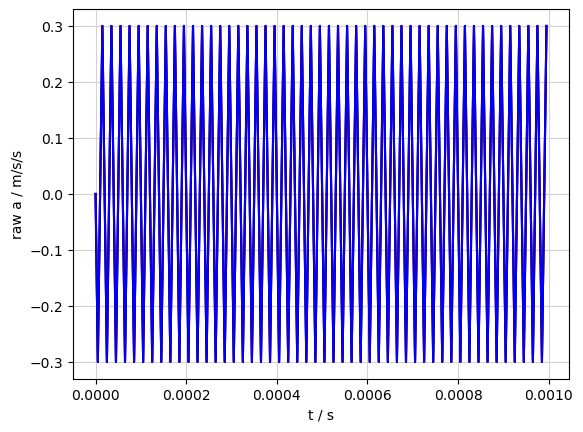

In [30]:
from matplotlib import pyplot as plt


plt.plot(df['sec'], df['a_n'], 'r')
plt.plot(df['sec'], df['a_e'], 'black')
plt.plot(df['sec'], df['a_u'], 'b')

plt.grid(which="major", color="lightgray", linestyle="solid")
plt.ylabel("raw a in m/s/s")
plt.xlabel("t in s")

Text(0.5, 0, 't / s')

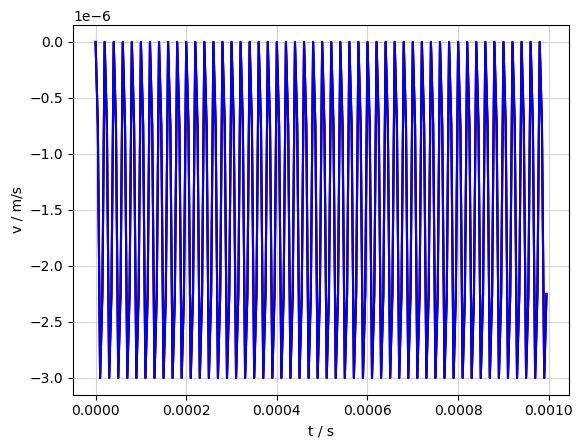

In [31]:
plt.plot(df['sec'], df['v_n'], 'r')
plt.plot(df['sec'], df['v_e'], 'black')
plt.plot(df['sec'], df['v_u'], 'b')

plt.grid(which="major", color="lightgray", linestyle="solid")
plt.ylabel("v in m/s")
plt.xlabel("t in s")